# Assignment 6-3:
### https://github.com/YutingWuTia/comp-lab-class/blob/main/Week6/Assignment.md

(Tutotial exercise)
Part1: visualize the behavior of the CV during the simulation, as reported in the COLVAR file
Part2: use the HILLS file to visualize the decrease of the Gaussian height during the simulation

(Assignment exercise)
Part3:
The grid file has the bias. 
Plot the negative of the energy column in the grid file, does it look like the FES? Is it slightly different? Perhaps scaled by a constant that you can figure out?

In [14]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# load data
time_colvar, phi_colvar, psi_colvar, MetadBias_colvar = np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_3/adp_colvar.txt", skiprows=5, unpack=True)

time_hills, phi_hills, sigma_phi_hills, height_hills, biasf_hills = np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_3/adp.hills.txt", skiprows=5, unpack=True)

phi_grid, MetadBias_grid, derivatives_phi_grid = np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_3/adp.grid.dat", skiprows=5, unpack=True)

# check data we are going to plot
print('time_colvar:', time_colvar.shape)
print('phi_colvar:', phi_colvar.shape)

print('time_hills:', time_hills.shape)
print('height_hills:', height_hills.shape)

print('phi_grid:', phi_grid.shape)
print('MetadBias_grid:', MetadBias_grid.shape)
print('derivatives_phi_grid:', derivatives_phi_grid.shape)

time_colvar: (500001,)
phi_colvar: (500001,)
time_hills: (10000,)
height_hills: (10000,)
phi_grid: (58,)
MetadBias_grid: (58,)
derivatives_phi_grid: (58,)


### Part1: visualize the behavior of the CV during the simulation, as reported in the COLVAR file

Plot saved: ../Figures/ADP_CV_TimeEvolution.pdf


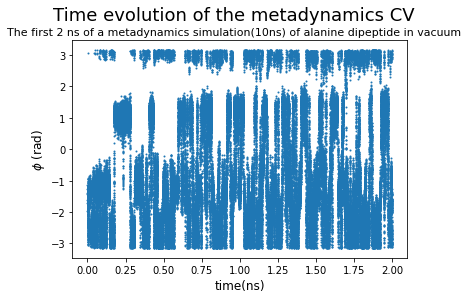

In [16]:
# plot colvar-phi vs time
fig=plt.figure(1)

# plt.scatter(time_colvar[:100000]/1000, phi_colvar[:100000], alpha=1, label=' biasfactor10 \n pace500 \n height1.2 \n sigma0.55 \n metad_10ns')
# plt.legend()
plt.scatter(time_colvar[:100000]/1000, phi_colvar[:100000], alpha=1, s=1)

# set all labels
plt.ylabel(r'$\phi$ (rad)', fontsize=12)
plt.xlabel('time(ns)', fontsize=12)
# set titles
plt.text(x=0.5, y=0.95, s="Time evolution of the metadynamics CV", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.9, s= "The first 2 ns of a metadynamics simulation(10ns) of alanine dipeptide in vacuum", fontsize=11, ha="center", transform=fig.transFigure)
# save figure
plt.savefig("../Figures/ADP_CV_TimeEvolution.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_CV_TimeEvolution.pdf")
plt.show()


### Part2: use the HILLS file to visualize the decrease of the Gaussian height during the simulation

Plot saved: ../Figures/ADP_GaussianHeight_TimeEvolution.pdf


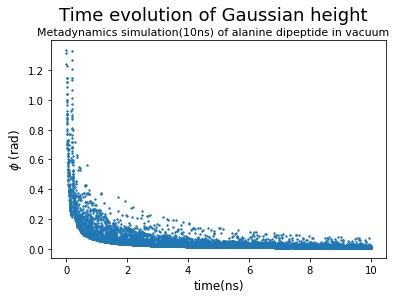

In [17]:
# plot Gaussian height vs time
fig=plt.figure(2)
# plt.scatter(time_hills/1000, height_hills, alpha=1, edgecolors="black",linewidths=0.2, s=2, label='biasfactor10 /n pace500 /n height1.2 /n sigma0.55 /n metad_10ns')
# plt.legend()
plt.scatter(time_hills/1000, height_hills, alpha=1, s=2)

# set all labels
plt.ylabel(r'$\phi$ (rad)', fontsize=12)
plt.xlabel('time(ns)', fontsize=12)
# set titles
plt.text(x=0.5, y=0.95, s="Time evolution of Gaussian height", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.9, s= "Metadynamics simulation(10ns) of alanine dipeptide in vacuum", fontsize=11, ha="center", transform=fig.transFigure)
# save figure
plt.savefig("../Figures/ADP_GaussianHeight_TimeEvolution.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_GaussianHeight_TimeEvolution.pdf")
plt.show()

### Part3: The grid file has the bias. Plot the negative of the energy column in the grid file, does it look like the FES? Is it slightly different? Perhaps scaled by a constant that you can figure out?

In [39]:
# calculate free energy
# phi_grid, MetadBias_grid, derivatives_phi_grid were extract from grid file

biasfactor = 10
free_energy = MetadBias_grid * (biasfactor/(1-biasfactor))

# print(free_energy)


Plot saved: ../Figures/ADP_Energy(gridFile)_FreeEnergy.pdf


<Figure size 432x288 with 0 Axes>

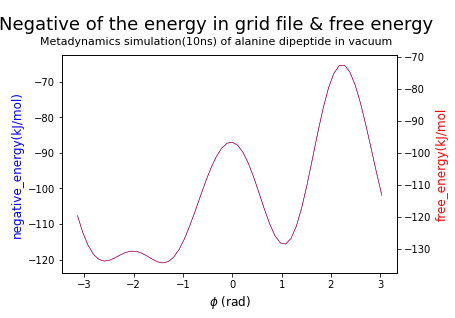

In [43]:
#define colors to use
col1 = 'blue'                  
col2 = 'red'                    
fig=plt.figure(3)
# plot negative of the energy in grid file & free energy
free_energy_plot,energy_in_grid = plt.subplots()                                       #define subplots
energy_in_grid.plot(phi_grid, - MetadBias_grid, color=col1,linewidth=0.5)                        #add first line to plot
energy_in_grid.set_xlabel(r'$\phi$ (rad)', fontsize=12)                                   #add x-axis label
energy_in_grid.set_ylabel('negative_energy(kJ/mol)', color=col1, fontsize=12)         #add y-axis label
#Kinetic_plot.show
free_energy_plot = energy_in_grid.twinx()                                                #define second y-axis that shares x-axis with current plot
free_energy_plot.plot(phi_grid, free_energy, color=col2,linewidth=0.5)                        #add second line to plot
free_energy_plot.set_ylabel('free_energy(kJ/mol', color=col2, fontsize=12)        #add second y-axis label

# set all titles
plt.text(x=0.5, y=1, s="Negative of the energy in grid file & free energy", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.95, s= "Metadynamics simulation(10ns) of alanine dipeptide in vacuum", fontsize=11, ha="center", transform=fig.transFigure)

# save figure
plt.savefig("../Figures/ADP_Energy(gridFile)_FreeEnergy.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_Energy(gridFile)_FreeEnergy.pdf")
plt.show()

In [ ]:
# The purple plot means they overlap well

In [25]:
print(- MetadBias_grid)
print(MetadBias_grid.shape)

[-107.64480527 -112.37981636 -116.01984728 -118.51240304 -119.91677369
 -120.39453305 -120.16344761 -119.49817475 -118.68056123 -117.98281
 -117.60464979 -117.65685486 -118.14396115 -118.94510561 -119.85725521
 -120.60461218 -120.91042907 -120.53786659 -119.32092321 -117.20207331
 -114.24741362 -110.60882928 -106.51582567 -102.24509759  -98.07900076
  -94.27474983  -91.08068227  -88.70507005  -87.30524302  -87.00870261
  -87.87301488  -89.88916294  -92.94764784  -96.84743966 -101.26529603
 -105.80463826 -109.98369167 -113.30374451 -115.2934392  -115.60130976
 -114.0176727  -110.54014179 -105.36973516  -98.90690055  -91.68807794
  -84.35547571  -77.53597311  -71.83975519  -67.74032762  -65.55087525
  -65.41845841  -67.28661426  -70.94822904  -76.04674218  -82.16308222
  -88.82055205  -95.55048749 -101.94442302]
(58,)


In [37]:
print(phi_grid)
print(phi_grid.shape)

[-3.14159265 -3.03326187 -2.92493109 -2.81660031 -2.70826953 -2.59993875
 -2.49160797 -2.38327718 -2.2749464  -2.16661562 -2.05828484 -1.94995406
 -1.84162328 -1.7332925  -1.62496172 -1.51663094 -1.40830016 -1.29996937
 -1.19163859 -1.08330781 -0.97497703 -0.86664625 -0.75831547 -0.64998469
 -0.54165391 -0.43332312 -0.32499234 -0.21666156 -0.10833078  0.
  0.10833078  0.21666156  0.32499234  0.43332312  0.54165391  0.64998469
  0.75831547  0.86664625  0.97497703  1.08330781  1.19163859  1.29996937
  1.40830016  1.51663094  1.62496172  1.7332925   1.84162328  1.94995406
  2.05828484  2.16661562  2.2749464   2.38327718  2.49160797  2.59993875
  2.70826953  2.81660031  2.92493109  3.03326187]
(58,)


In [38]:
print(free_energy)
print(free_energy.shape)

Figure(432x288)


AttributeError: 'Figure' object has no attribute 'shape'

In [ ]:
# plot negative of the energy in grid file & free energy

fig=plt.figure(3)

#plt.plot(phi_grid, - MetadBias_grid)
plt.plot(phi_grid, - MetadBias_grid, alpha=1,label= "negative energy in grid file")          
plt.plot(phi_grid, free_energy, alpha=0.5, c="y",label= "free energy")          
plt.legend()                     
# set all labels
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Energy(kJ/mol)')
plt.ylim(-130, -50)
# set all titles
plt.text(x=0.5, y=0.88, s="Negative of the energy in grid file & free energy", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Metadynamics simulation(10ns) of alanine dipeptide in vacuum", fontsize=11, ha="center", transform=fig.transFigure)
# adjust 
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.ylim(-4,5)
# save figure
plt.savefig("../Figures/ADP_Energy(gridFile)_FreeEnergy.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_Energy(gridFile)_FreeEnergy.pdf")
plt.show()